In [1]:
import numpy as np
import math
import csv
import pandas as pd
import seaborn as sns
import random

In [2]:
def cardinality(cluster):
    return np.sum(np.array(cluster), axis=0)[1]

def make_county(clusters, j, dic):
    cluster = clusters[j]
    for point in cluster:
        county = float(point[0])
        if county not in dic: dic[county] = []
        if j not in dic[county]: dic[county] += [j]
    return dic

def make_district(clusters, j, dic):
    cluster = clusters[j]
    dic[j] = []
    for point in cluster:
        county = float(point[0])
        if county not in dic[j]: dic[j] += [county]
    return dic

def find_county(j, county, gamma, input_dic):
    if j in input_dic[county]: return (len(input_dic[county]))**gamma
    else: return (len(input_dic[county]) + 1)**gamma

def find_district(j, county, delta, dic_d):
    if county in dic_d[j]: return(len(dic_d[j]))**delta
    else: return(len(dic_d[j]) + 1)**delta
    
def weighted(current_cluster, alpha, denom):
    num = cardinality(current_cluster)**alpha
    return(num / denom)

def distance(x1, x2):
    x1 = x1[2:]
    x2 = x2[2:]
    return np.linalg.norm(np.array(x1) - np.array(x2)) 

def initial_voronoi(X, anchors, k):
    clusters = {}
    for n in range(k): # for each cluster
        clusters[n] = []
    for i in range(len(X)):
        point = X[i]
        closest_val = np.argmin([distance(point, anchors[j]) for j in range(k)])
        clusters[closest_val] += [point]
    return clusters

def voronoi(X, anchors, weights, k, gamma, input_dic):
    clusters = {}
    for n in range(k): # for each cluster
        clusters[n] = []
    for i in range(len(X)):
        point = X[i]
        c_list = []
        for j in range(k):
            d = distance(point, anchors[j])
            w = weights[j]
            sp = find_county(j, point[0], gamma, input_dic)
            # sc = find_district(j, point[0], delta, dic_d)
            c_list.append(d*w*sp)
        closest_val = np.argmin(c_list)
        clusters[closest_val] += [point]
    return clusters


def centroid(clusters, k):
    ret = []
    for i in range(k):
        if len(clusters[i]) > 0:
            ret.append(np.mean(clusters[i], axis = 0))
        else: ret.append(clusters[np.argmax([cardinality(clusters[j]) for j in range(k)])][0])
            
    # ret = [np.mean(clusters[i], axis = 0) for i in range(k)]
    return ret

In [3]:
def kmeans(X, k, alpha = 5, beta = 0.5, gamma = 1, it = 100, t = 0.01):
    bo = True
    index = np.array([g for g in np.arange(0, len(X), int(len(X)/k))]) # find "evenly" spaced indices
    centroids = np.array(X)[index] # assign centroids "randomly"
    clusters = initial_voronoi(X, centroids, k) # initialize clisters
    pop_list = [cardinality(clusters[d]) for d in range(k)]
    pop_dif = np.min(pop_list) / np.max(pop_list)
    # print(pop_dif)
    i = 0
    s = [1/k]*k
    best_dif = 0
    best_pop_clusters = {}
    while(bo and i < it):
        # print("round: ", i)
        new_centroids = centroid(clusters, k)
        if np.mean([distance(new_centroids[m], centroids[m]) for m in range(k)]) < t:
            bo = False # if the distance between previously defined centroids and current centroids is small enough stop
            break
        centroids = new_centroids
        denom = 0
        input_dic = {}
        # dic_d = {}
        for n in range(k):
            cluster = clusters[n]
            denom += cardinality(cluster)**alpha # needed for weight calculations
            input_dic = make_county(clusters, n, input_dic) # used for county splitting calculations
            # dic_d = make_district(clusters, n, dic_d) 
        for j in range(k):
            current_cluster = clusters[j]
            wj = weighted(current_cluster, alpha, denom)
            s[j] = s[j]*beta + (1-beta)*wj # weighting coefficient formula from guest paper
        clusters = voronoi(X, centroids, s, k, gamma, input_dic) # re assign clusters 
        pop_list = [cardinality(clusters[d]) for d in range(k)]
        pop_dif = np.min(pop_list) / np.max(pop_list)
        #print(pop_dif)
        if(pop_dif > best_dif): 
            best_dif = pop_dif
            best_pop_clusters = clusters.copy()
        i += 1
    return centroids, clusters, best_pop_clusters

In [4]:
with open('data/tx_input_t.csv', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    header = []
    header = next(csvreader)

    rows = []
    for row in csvreader:
            rows.append(row)

points = []
#ind = np.array([0,2,3,4])
#ind = np.array([1:5])
for item in rows:
    points.append([float(x) for x in np.array(item)[1:5]])

In [ ]:
file ='../dummy_generation/block_dummy_56'
with open(file + '.csv', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    header = []
    header = next(csvreader)

    rows = []
    for row in csvreader:
            rows.append(row)

# get all block points with county, pop, long, lat
dummy = []
for item in rows:
    dummy.append([float(x) for x in item[1:5]])

In [12]:
k = 38
cent_list, clusters, pop_clusters = kmeans(points, k=k, alpha=12.9, beta=0.95, gamma=0.5, it=1000, t=0.001)

round:  0
0.06404337045123469
round:  1
0.07987668026354051
round:  2
0.08587399007181214
round:  3
0.09227521703946516
round:  4
0.10845736001346919
round:  5
0.10068738093643166
round:  6
0.10900745169649359
round:  7
0.10697325106862751
round:  8
0.12069433217420464
round:  9
0.12201147671042621
round:  10
0.1549340435026546
round:  11
0.22245522448465285
round:  12
0.23042504319544668
round:  13
0.2579920980281485
round:  14
0.2481373988189202
round:  15
0.22894628546985535
round:  16
0.19899715174655888
round:  17
0.21739153860590751
round:  18
0.2642685548442438
round:  19
0.2993082538764529
round:  20
0.28290216218081093
round:  21
0.3250595996654493
round:  22
0.35526835530538686
round:  23
0.40402335107470033
round:  24
0.39798788728164575
round:  25
0.45302211328226333
round:  26
0.3845611738944401
round:  27
0.40289932738642786
round:  28
0.4847625535502615
round:  29
0.5304157795093342
round:  30
0.5545893829918173
round:  31
0.5536108194322938
round:  32
0.5548442119497364

In [13]:
ret = []
ret1 = []
for item in clusters:
    for val in clusters[item]:
        ret.append([item, val[0], val[1], val[2], val[3]])
for item in pop_clusters:
    for val in pop_clusters[item]:
        ret1.append([item, val[0], val[1], val[2], val[3]])
df = pd.DataFrame(ret, columns = ['district', 'county', 'population', 'lat', 'long'])
pop_df = pd.DataFrame(ret1, columns = ['district', 'county', 'population', 'lat', 'long'])
pd.DataFrame.std(df.groupby('district')['population'].sum())

36730.09728722507

In [14]:
np.mean(pop_df.groupby('county')['district'].nunique())

1.263779527559055

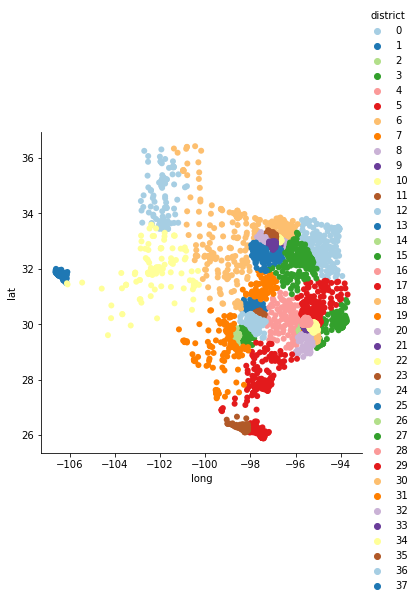

In [16]:
plt = sns.relplot(
    data=pop_df,
    x="long", y="lat",
        hue="district", 
    #aspect=2.5,
    linewidth=0,
    palette=sns.color_palette("Paired", n_colors=k))
plt

In [36]:
#plt.savefig('maps/nc_maps/nc_tract_13-9_9_8.png')

In [17]:
pop_df.groupby('district')['population'].sum()

district
0     750267.0
1     777301.0
2     785703.0
3     780524.0
4     726716.0
5     711676.0
6     785239.0
7     765160.0
8     787130.0
9     775057.0
10    796471.0
11    752354.0
12    759094.0
13    860306.0
14    791395.0
15    708107.0
16    782148.0
17    772144.0
18    784288.0
19    788864.0
20    759175.0
21    779365.0
22    766609.0
23    726781.0
24    784996.0
25    752498.0
26    801192.0
27    725951.0
28    795611.0
29    721913.0
30    734525.0
31    722932.0
32    786109.0
33    780684.0
34    723664.0
35    782273.0
36    766592.0
37    794691.0
Name: population, dtype: float64

In [15]:
pop_df.groupby('district')['population'].sum().min() / pop_df.groupby('district')['population'].sum().max()

0.8230873665881675

k=50, alpha=6.5, beta=0.92, gamma=0, it=100, t=0.01: 0.6968914975796522
k=50, alpha=6.6, beta=0.92, gamma=0, it=100, t=0.001: 0.8155136629434105 

In [57]:
frame = pd.DataFrame(pop_df.groupby('county')['district'].unique())

In [58]:
frame

,district
county,
1100100.0,[0]
1100200.0,[0]
3960100.0,[0]
3960200.0,[1]
3960301.0,[1]
...,...
57210900.0,[1]
57211000.0,[1]
57211100.0,[1]


In [242]:
len(frame[frame['district'].str.len() > 1])

5

In [ ]:
k = 38

a = 14.5

pop_mat = []
for i in range(55):
    pop_list = []
    g = 0
    for j in range(30):
        try:
            cent_list, clusters, o = kmeans(points, k=k, alpha=a, beta=0.95, gamma=g, it=100, t = 0.001)
            ret = []
            for item in clusters:
                for val in clusters[item]:
                    ret.append([item, val[0], val[1], val[2], val[3]])
            df = pd.DataFrame(ret, columns = ['district', 'county', 'population', 'lat', 'long'])
            pop_dif = df.groupby('district')['population'].sum().min() / df.groupby('district')['population'].sum().max()
        except:
            pop_dif = -1
        pop_list.append(pop_dif)
        print("a:", round(a, 1), " g:", round(g, 1), " ", pop_dif)
        if pop_dif > 0.9: print("over 0.9")
        g += 0.1 
    pop_mat.append(pop_list)
    a += 0.1

ret = []
i = 0
for item in clusters:
    i += 1
    for val in clusters[item]:
        ret.append([i, val[0], val[1], val[2], val[3]])

df = pd.DataFrame(ret, columns = ['district', 'county', 'population', 'lat', 'long'])

a: 13.7  g: 0   -1
a: 13.7  g: 0.1   -1
a: 13.7  g: 0.2   0.533496523449819
a: 13.7  g: 0.3   0.636255468389905
a: 13.7  g: 0.4   0.169232737663667
a: 13.7  g: 0.5   0.4961260637873892
a: 13.7  g: 0.6   0.004594976434926202
a: 13.7  g: 0.7   0.42261301334436746
a: 13.7  g: 0.8   0.021642516136825576
a: 13.7  g: 0.9   0.5538359881569721
a: 13.7  g: 1.0   -1
a: 13.7  g: 1.1   0.16735781755205478
a: 13.7  g: 1.2   0.48413208174152356
a: 13.7  g: 1.3   0.5347517204489574
a: 13.7  g: 1.4   0.8105446338243605
a: 13.7  g: 1.5   0.16288763745671778
a: 13.7  g: 1.6   0.27282401715130344
a: 13.7  g: 1.7   0.035963657527369526
a: 13.7  g: 1.8   0.49132776756420865
a: 13.7  g: 1.9   0.21816428212172517
a: 13.7  g: 2.0   -1
a: 13.7  g: 2.1   0.26738143867816416
a: 13.7  g: 2.2   0.03569495411288299
a: 13.7  g: 2.3   0.19719098185443715
a: 13.7  g: 2.4   -1
a: 13.7  g: 2.5   0.06950299124154195
a: 13.7  g: 2.6   0.08188587877974703
a: 13.7  g: 2.7   -1
a: 13.7  g: 2.8   0.2251199980186872
a: 13.7  g

a: 14.4  g: 2.5   0.05250749307103506
a: 14.4  g: 2.6   0.025158982842899136
a: 14.4  g: 2.7   0.06439239184711062
a: 14.4  g: 2.8   -1
a: 14.4  g: 2.9   -1
a: 14.5  g: 0   -1
a: 14.5  g: 0.1   0.09184983300942454
a: 14.5  g: 0.2   0.203215867180003
a: 14.5  g: 0.3   -1
a: 14.5  g: 0.4   -1
a: 14.5  g: 0.5   0.7671675964036564
a: 14.5  g: 0.6   0.006982468549774234
a: 14.5  g: 0.7   0.152281615997924
a: 14.5  g: 0.8   0.04869255000189761
a: 14.5  g: 0.9   0.37038122802619555
a: 14.5  g: 1.0   0.05522567979187151
a: 14.5  g: 1.1   0.7364881008574562
a: 14.5  g: 1.2   0.07538098061771267
a: 14.5  g: 1.3   0.5079044009347813
a: 14.5  g: 1.4   0.0087067951889866
a: 14.5  g: 1.5   0.6381274489206668
a: 14.5  g: 1.6   0.14752499518114698
a: 14.5  g: 1.7   0.2747552057694931
a: 14.5  g: 1.8   0.05900213891478743
a: 14.5  g: 1.9   0.510385517459321


In [37]:
# ret = []
# tot = []
# for l in pop_mat:
#     ret.append(np.nanargmax(l))
#     tot.append(l[np.nanargmax(l)])
# print(ret[np.nanargmax(tot)])
# print(np.nanargmax(tot))

,district,county,population,lat,long
0,0,1100100.0,4426.0,38.301564,-112.605093
1,0,1100200.0,2646.0,38.351734,-113.231813
2,0,3960100.0,3498.0,41.685047,-113.076331
3,0,7000100.0,3236.0,39.571043,-110.738983
4,0,7000200.0,4211.0,39.611155,-110.819160
...,...,...,...,...,...
708,3,49010223.0,2489.0,40.424739,-111.816979
709,3,49010224.0,3619.0,40.415051,-111.817939
710,3,49010225.0,4188.0,40.382079,-111.761187
711,3,49010226.0,3751.0,40.381459,-111.739394


In [18]:
#pop_df.to_csv('data/tx_final_tract.csv')

NC:
alpha=6.5, beta=0.92, gamma=2, it=100: 40,438.38 & 1.3 (80%) -- NOT CONTIGUOUS
alpha=7, beta=0.92, gamma=1.5, it=100: 55,806.96 & 1.37
alpha=7, beta=0.92, gamma=2, it=100: 49,769.36 & 1.28 (78%)
alpha=7, beta=0.92, gamma=2.25, it=100: 254,363.42 & 1.19
alpha=7, beta=0.92, gamma=1.75, it=100: 64,361.77 & 1.32
alpha=8, beta=0.92, gamma=2, it=100: 47,906.41 & 1.24 (75%)
alpha=9, beta=0.92, gamma=2, it=100: 39,767.68 & 1.23 (85%) -- NOT CONTIGUOUS

UT:
alpha=7, beta=0.95, gamma=0.0001, it=100: 77,327.66 & 1.31 (79%)
alpha=6.5, beta=0.95, gamma=0.0001, it=100: 72,940.60 & 1.31 (82%)
alpha=6.5, beta=0.95, gamma=0.2, it=100: 72,480.21 & 1.27 (82%)
alpha=4.9, beta=0.9, gamma=1, it=100: 60097.74 & 1.21 (84%)

10.7 & 0.6
11.4 & 1.2
11.9 & 0.2
12.1 & 0.9
12.7 % 0.2
13.8 & 0.1
13.9 & 0.8
14 & 0.9

nc:
a: 13.4  g: 0.1 b: 0.9
13.5  g: 0.9 b: 0.9
a: 13.6  g: 0.8 b: 0.9
a: 13.7  g: 0.6 b: 0.9   0.9493383846559548

ut:
a: 15.7  g: 0.1 b: 0.9   0.9102387862125146
a: 16.1  g: 0.3 b: 0.9   0.9176833924220745

a: 8.6  g: 1.1 d: 0   0.9093325018157368

TX:

a: 8.7  g: 1.0   0.7758579429064774
a: 11.6  g: 0.3   0.7910871248137291
11.7	0.4	0.7995811274
a: 13.4  g: 0.5   0.8023397257805344
12.9	0.5	0.8125379669